<a href="https://colab.research.google.com/github/pcharlie12345/collagestudent/blob/main/MLwithLDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/colabs/diabetes_012_health_indicators_BRFSS2015.csv')

df.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(253680, 22)

In [64]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [65]:
target_name = 'Diabetes_012'
Y = df[target_name]

X = df.drop(target_name, axis=1)

In [66]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


In [67]:
X.shape

(253680, 21)

In [68]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Diabetes_012, dtype: int64

In [69]:
Y.shape

(253680,)

In [70]:
Y.unique()

array([0, 2, 1])

In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sclae = sc.fit_transform(X)

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_sclae, Y, test_size = 0.2, random_state = 0)

In [90]:
X_train.shape, Y_train.shape

((202944, 21), (202944,))

In [91]:
X_test.shape, Y_test.shape

((50736, 21), (50736,))

In [92]:
#apply the Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, Y_train)
X_test_lda = lda.transform(X_test)

In [93]:
X_train_lda.shape, X_test_lda.shape

((202944, 2), (50736, 2))

In [94]:
lda.explained_variance_ratio_

array([0.99361493, 0.00638507])

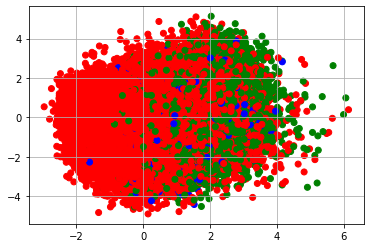

In [96]:
colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'black', 
          'brown', 'grey', 'cyan', 'magenta', 'lime', 'azure', 'olive',
          'tan', 'aqua', 'coral', 'lavender', 'silver', 'maroon', 'pink']
vectorizer = np.vectorize(lambda X: colors[X % len(colors)])
plt.scatter(X_train_lda[:,0],X_train_lda[:,1], c=vectorizer(Y_train))
plt.grid()

In [97]:
X_train_lda.shape, Y_train.shape

((202944, 2), (202944,))

In [98]:
#apply the Logistic Regression
from pandas.core.common import random_state
from pandas._libs.algos import rank_1d
from sklearn.linear_model import LogisticRegression
import datetime
start = datetime.datetime.now()
lg = LogisticRegression(random_state = 0)
lg.fit(X_train_lda, Y_train)
end = datetime.datetime.now()
print("total execution with LDA : ", end-start)

total execution with LDA :  0:00:01.588311


In [108]:
Y_pred_lda = lg.predict(X_test_lda)

In [109]:
Y_pred_lda.shape

(50736,)

In [110]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(Y_test, Y_pred_lda)

print(cm)

[[41607     0  1010]
 [  829     0    79]
 [ 5903     0  1308]]


In [111]:
from sklearn import metrics
print("test accuracy on 21-features: ", metrics.accuracy_score(Y_test, Y_pred_lda)*100)

test accuracy on 21-features:  84.5849101229896


In [112]:
print("classification report with LDA on 21-components: \n", classification_report(Y_test, Y_pred_lda, digits=4))

classification report with LDA on 21-components: 
               precision    recall  f1-score   support

           0     0.8607    0.9763    0.9149     42617
           1     0.0000    0.0000    0.0000       908
           2     0.5457    0.1814    0.2723      7211

    accuracy                         0.8458     50736
   macro avg     0.4688    0.3859    0.3957     50736
weighted avg     0.8006    0.8458    0.8072     50736



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
X_train_lda.shape, Y_train.shape

((202944, 2), (202944,))

In [114]:
#LDA as classification algorithm
import datetime
start = datetime.datetime.now()

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda1 = LDA()
lda1.fit(X_train_lda, Y_train)
end = datetime.datetime.now()
print("total execution time of LDA on 3-components: ", end-start)

total execution time of LDA on 3-components:  0:00:00.201530


In [115]:
Y_pred_lda1 = lda1.predict(X_test_lda)

In [116]:
print("test accuracy of LDA on 3-components: ", metrics.accuracy_score(Y_test, Y_pred_lda1)*100)

test accuracy of LDA on 3-components:  84.4666508987701


In [117]:
cm2 = confusion_matrix(Y_test, Y_pred_lda1)
cm2

array([[41239,     0,  1378],
       [  800,     0,   108],
       [ 5595,     0,  1616]])

In [118]:
print("classification report of LDA on-3components: \n", classification_report(Y_test, Y_pred_lda1, digits=4))

classification report of LDA on-3components: 
               precision    recall  f1-score   support

           0     0.8657    0.9677    0.9139     42617
           1     0.0000    0.0000    0.0000       908
           2     0.5210    0.2241    0.3134      7211

    accuracy                         0.8447     50736
   macro avg     0.4622    0.3973    0.4091     50736
weighted avg     0.8012    0.8447    0.8122     50736



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
